<a href="https://colab.research.google.com/github/tarun422/Bike-Sharing-Demand/blob/main/SouelBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Tarun

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


###**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings will not shows any warning while we make changes in dataframe
 
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# bike=pd.read_csv("/content/drive//MyDrive//Cap2/SeoulBikeData.csv", )

In [4]:
bike=pd.read_csv("/content/drive//MyDrive//Cap2/SeoulBikeData.csv", encoding='latin' )

### Dataset First View

In [5]:
# Dataset First Look

bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Dataset bottom look

bike.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# picking three random samples

bike.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6327,21/08/2018,957,15,29.5,57,2.0,2000,20.0,2.10,0.0,0.0,Summer,No Holiday,Yes
4526,07/06/2018,1116,14,28.2,44,1.7,644,14.7,3.11,0.0,0.0,Summer,No Holiday,Yes
1840,15/02/2018,273,16,3.2,16,3.0,2000,-20.2,1.45,0.0,0.0,Winter,Holiday,Yes


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

bike.shape
print('Rows =',bike.shape[0] )
print('columns =',bike.shape[1])

Rows = 8760
columns = 14


### Removing feature's units 
* Features with there unit, so remove extra units

In [9]:
# rename columns

bike.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                     'Temperature(°C)':'Temperature',
                     'Humidity(%)':'Humidity',
                     'Wind speed (m/s)':'Wind_speed',
                     'Visibility (10m)':'Visibility',
                     'Dew point temperature(°C)':'Dew_point_temperature',
                     'Solar Radiation (MJ/m2)':'Solar_Radiation',
                     'Rainfall(mm)':'Rainfall',
                     'Snowfall (cm)':'Snowfall',
                     'Functioning Day':'Functioning_Day'},inplace=True)

### Dataset Information

#### Features Information
* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
# Dataset Info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

* Date = string object, so convert into datetime format


In [11]:
# Convert format of date column

bike['Date']=bike['Date'].astype('datetime64[ns]')

In [12]:
# rename columns
bike.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                     'Temperature(°C)':'Temperature',
                     'Humidity(%)':'Humidity',
                     'Wind speed (m/s)':'Wind_speed',
                     'Visibility (10m)':'Visibility',
                     'Dew point temperature(°C)':'Dew_point_temperature',
                     'Solar Radiation (MJ/m2)':'Solar_Radiation',
                     'Rainfall(mm)':'Rainfall',
                     'Snowfall (cm)':'Snowfall',
                     'Functioning Day':'Functioning_Day'},inplace=True)

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count check

bike.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
missing_values=bike.isnull().sum()
missing_values

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

Here is no bar so here is no missing values 


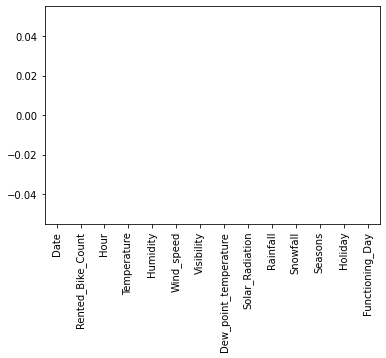

In [16]:
# Visualizing the missing values

missing_values.plot(kind='bar')
print("Here is no bar so here is no missing values ")

### What did you know about your dataset?

**Our Dataset have no duplicate value and also there is no null values and missing values**

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns

list(bike.columns)

['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning_Day']

In [18]:
# Dataset Describe
bike.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [19]:
bike.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [20]:
# Numarical Columns

numarical_column=list(bike.describe().columns)
numarical_column

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [21]:
# Categorical Columns

list_of_categorical_column=list(bike.describe(include=['object']).columns)
list_of_categorical_column

['Seasons', 'Holiday', 'Functioning_Day']

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable 

for i in list_of_categorical_column:
  un=bike[i].unique()
  print(i,"=",un)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']


### Target variables Description 

In [23]:
# Target variable/Dependent Variable

y = bike['Rented_Bike_Count']
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [24]:
# Independent Variable

x=bike.drop(['Rented_Bike_Count'], axis=1)
x

,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [25]:
# Adding month column

bike['month']=bike['Date'].dt.month

In [26]:
# Adding day column

bike['day']=bike['Date'].dt.day

In [27]:
# Adding Day name column

bike['day_name']=bike['Date'].dt.day_name()

In [28]:
# Adding weekeed column using lamda function

bike['weekend']=bike['day_name'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [29]:
bike.sample(6)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,day_name,weekend
2919,2018-01-04,1349,15,18.2,63,2.2,687,11.0,0.72,0.0,0.0,Spring,No Holiday,Yes,1,4,Thursday,0
2849,2018-03-29,1194,17,20.3,48,2.8,635,8.9,1.14,0.0,0.0,Spring,No Holiday,Yes,3,29,Thursday,0
3199,2018-04-13,999,7,8.8,33,1.2,2000,-6.6,0.11,0.0,0.0,Spring,No Holiday,Yes,4,13,Friday,0
2146,2018-02-28,285,10,6.5,53,2.0,518,-2.4,0.21,0.0,0.0,Winter,No Holiday,Yes,2,28,Wednesday,0
4555,2018-08-06,2797,19,24.5,63,3.1,970,16.9,0.46,0.0,0.0,Summer,No Holiday,Yes,8,6,Monday,0
1637,2018-07-02,45,5,-13.0,53,0.7,1810,-20.5,0.00,0.0,0.0,Winter,No Holiday,Yes,7,2,Monday,0


In [30]:
# updated numarical columns

numarical_column=list(bike.describe().columns)
numarical_column

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'month',
 'day',
 'weekend']

In [31]:
# updated categorical columns

list_of_categorical_column=list(bike.describe(include=['object']).columns)
list_of_categorical_column

['Seasons', 'Holiday', 'Functioning_Day', 'day_name']

In [32]:
# unique values of categorical columns

for i in list_of_categorical_column:
  un=bike[i].unique()
  print(i,"=",un)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']
day_name = ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Checking Outliers using box plot

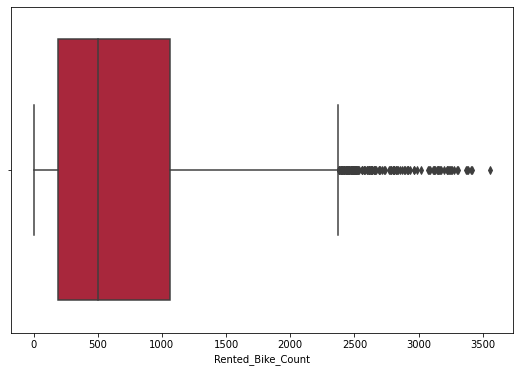

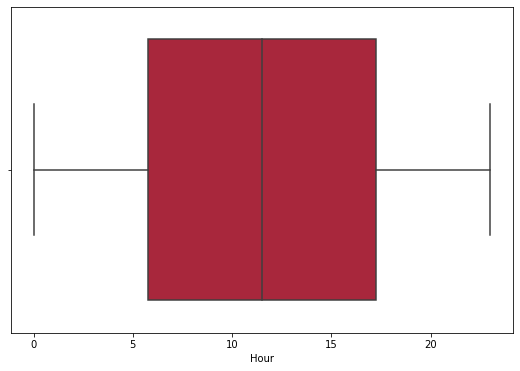

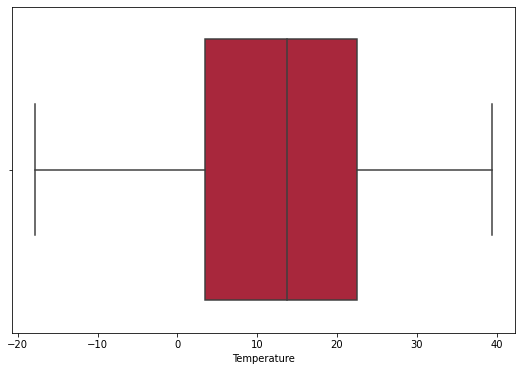

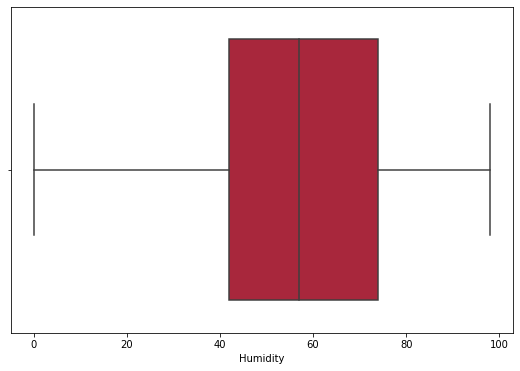

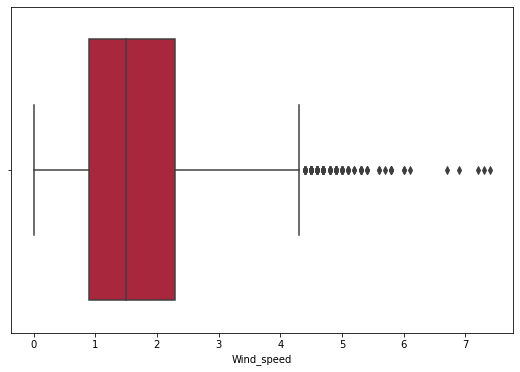

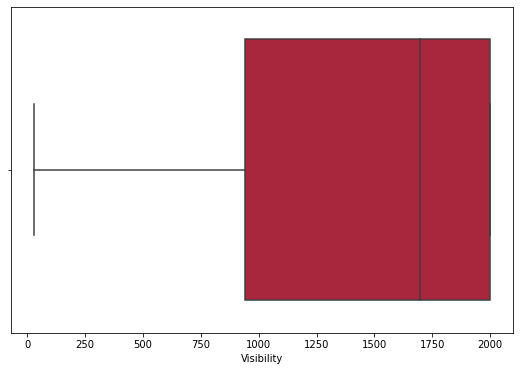

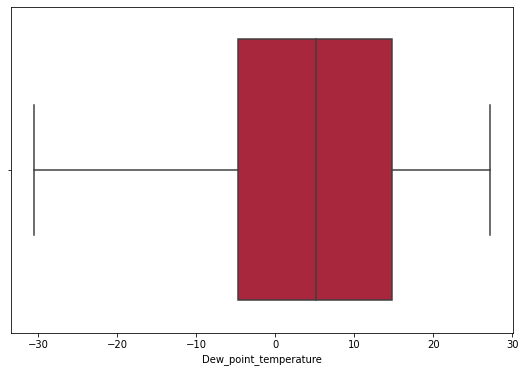

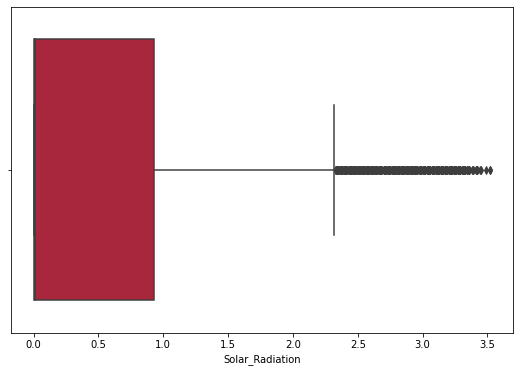

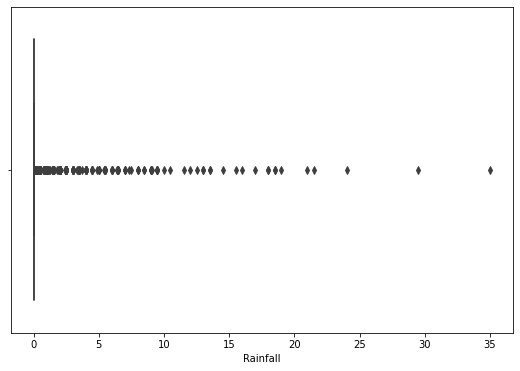

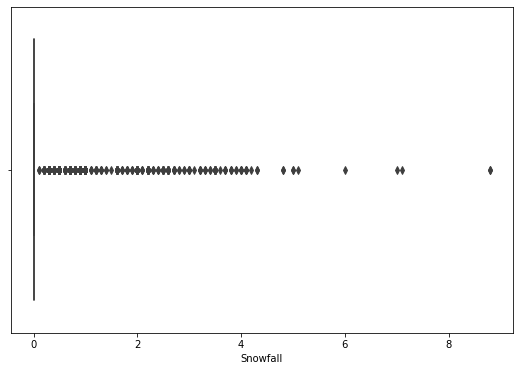

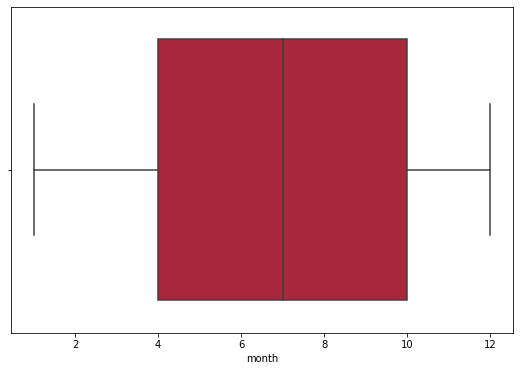

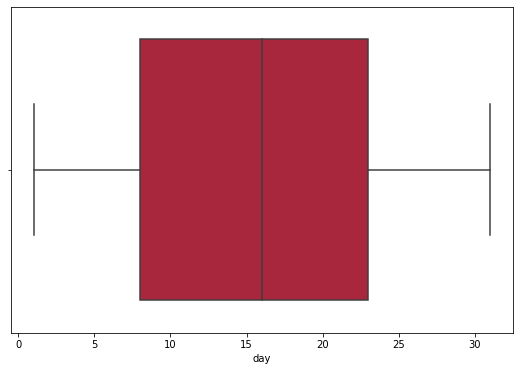

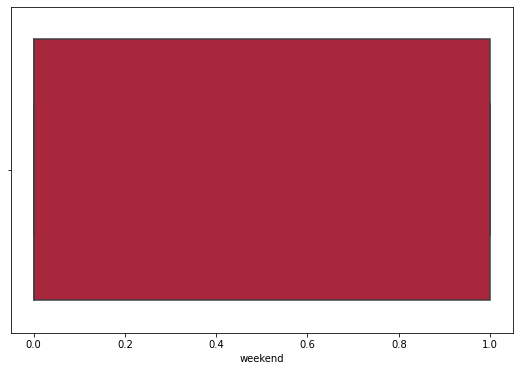

In [33]:
# checking outliers

for i in numarical_column:
 fig = plt.figure(figsize=(9, 6))
 sns.boxplot(bike[i],color='#bd112e')
 plt.show()

### Target variable distribution

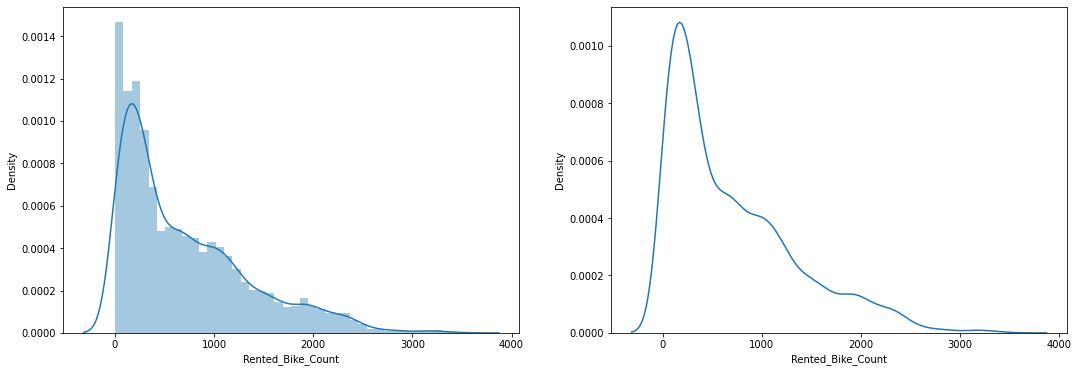

In [34]:
# Target variable distribution using distplot

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.distplot(bike['Rented_Bike_Count'])
plt.subplot(1,2,2)
sns.distplot(bike['Rented_Bike_Count'],hist=False)

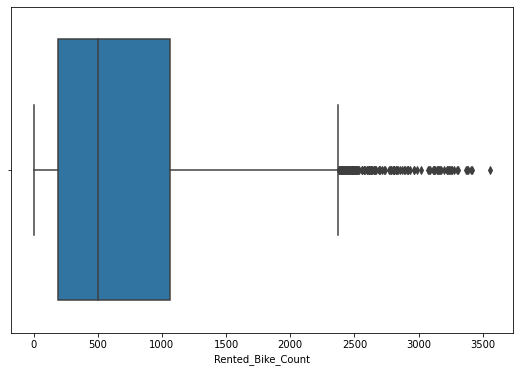

In [35]:
# box plot on target variable

fig = plt.figure(figsize=(9, 6))
sns.boxplot(bike['Rented_Bike_Count'])

### Univariate Analysis on categorical columns

In [36]:
# check for value count on categorical columns

for i in list_of_categorical_column:
  a=bike[i].value_counts()
  print(a)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning_Day, dtype: int64
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_name, dtype: int64


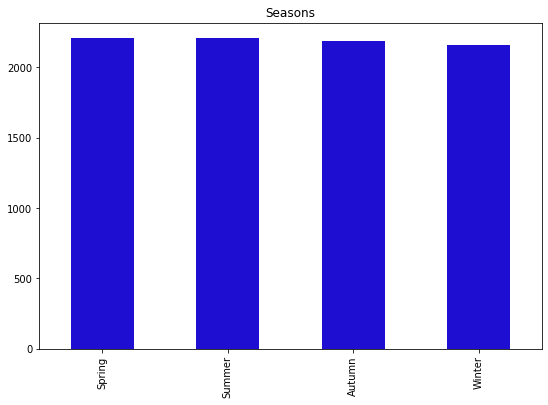

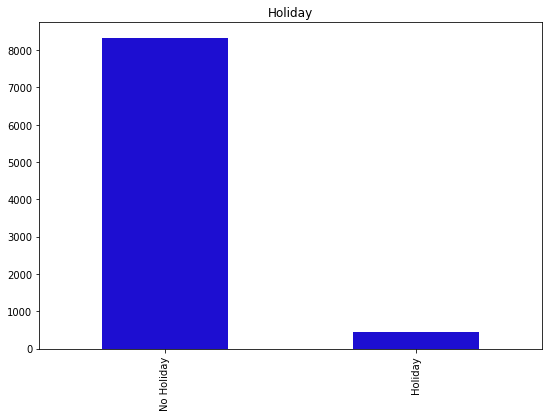

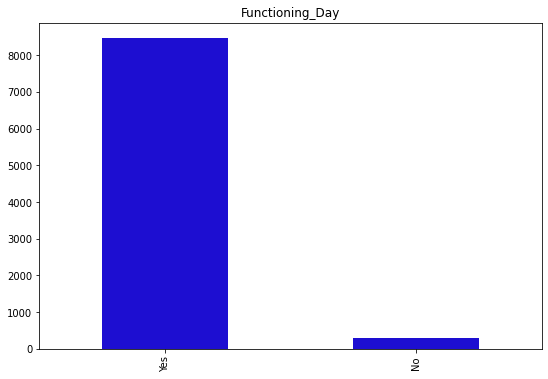

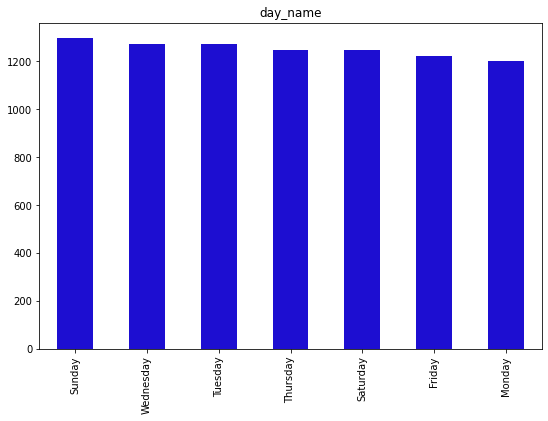

In [37]:
for i in list_of_categorical_column:
 fig = plt.figure(figsize=(9, 6))
 bike[i].value_counts().plot(kind='bar',color='#1d0ed1')
 plt.title(i)
 plt.show()

### Bivariate Analysis on categorical column with target column

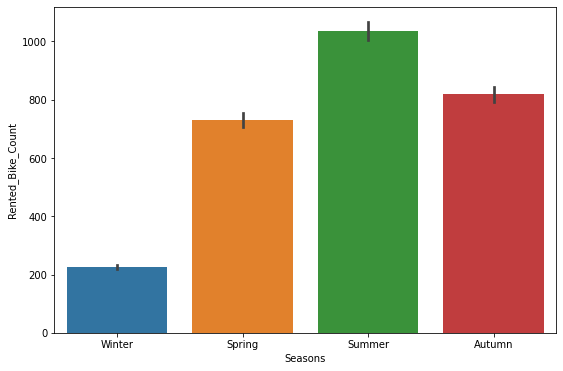

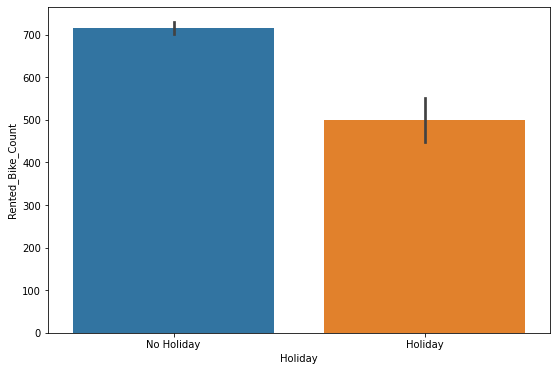

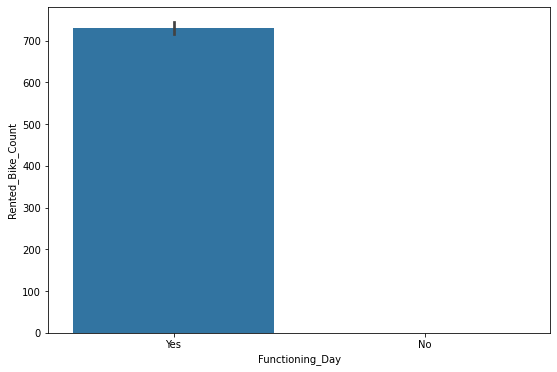

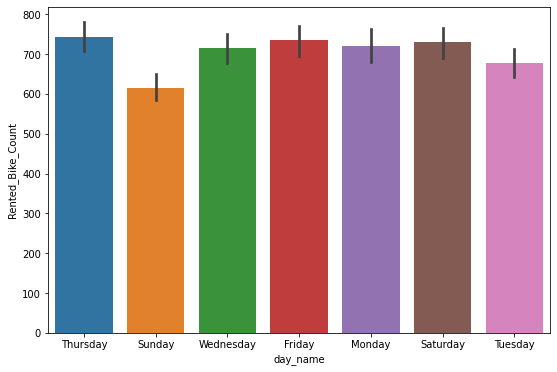

In [38]:
# Bivariate analysis of rente bike counts with each categorical column

for i in list_of_categorical_column:
  fig = plt.figure(figsize=(9, 6))
  sns.barplot(y=bike['Rented_Bike_Count'],x=bike[i])
  plt.show()

### Multivariate Analysis

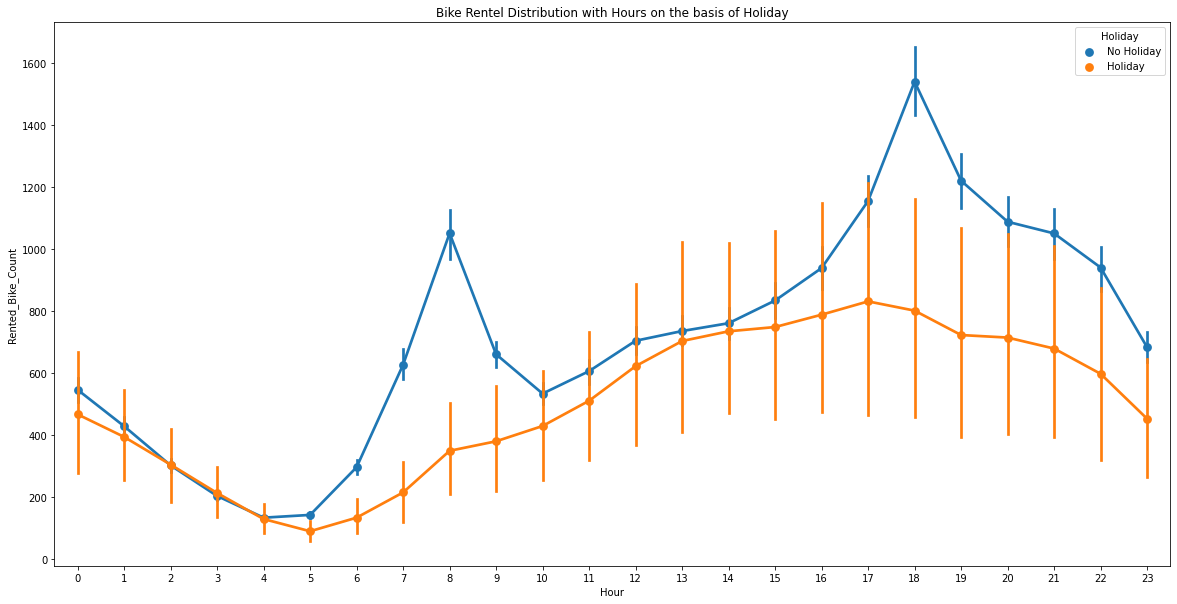

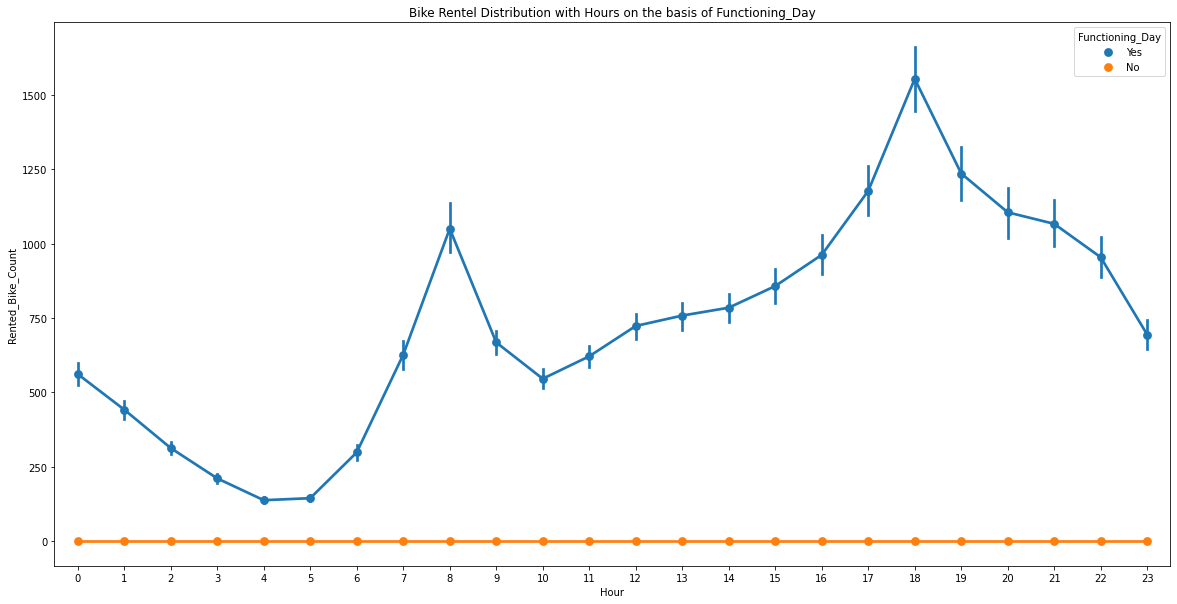

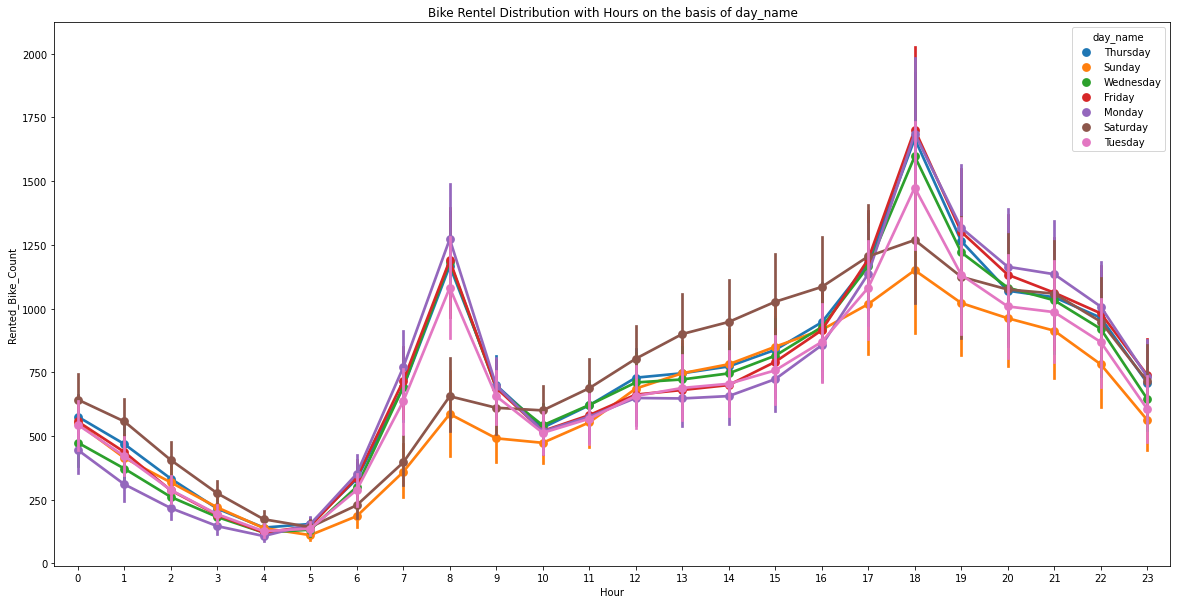

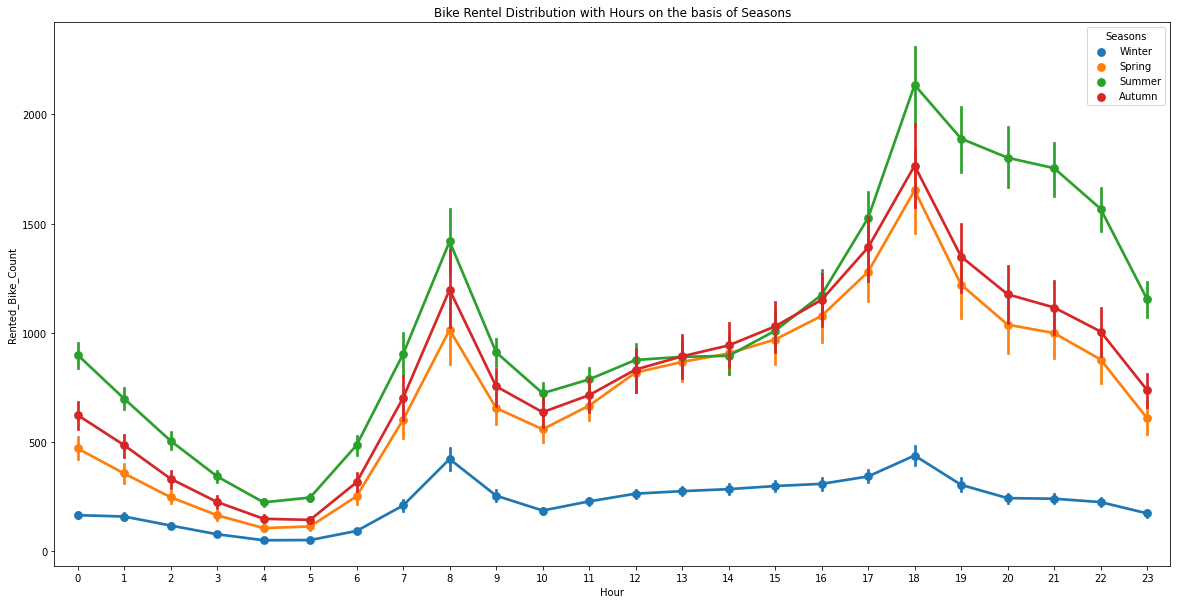

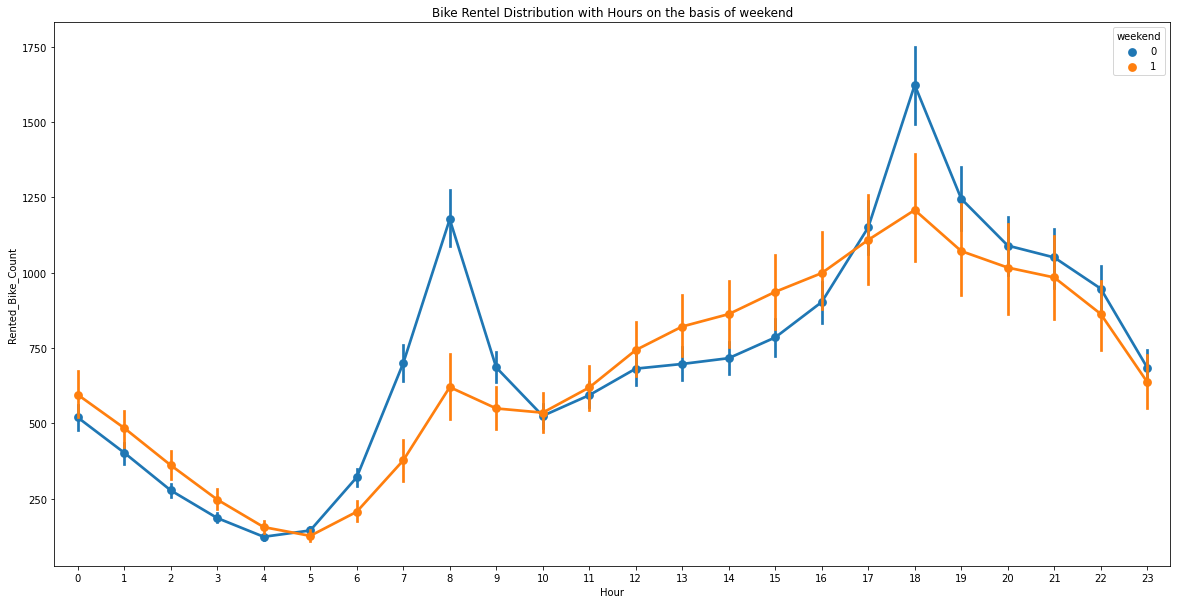

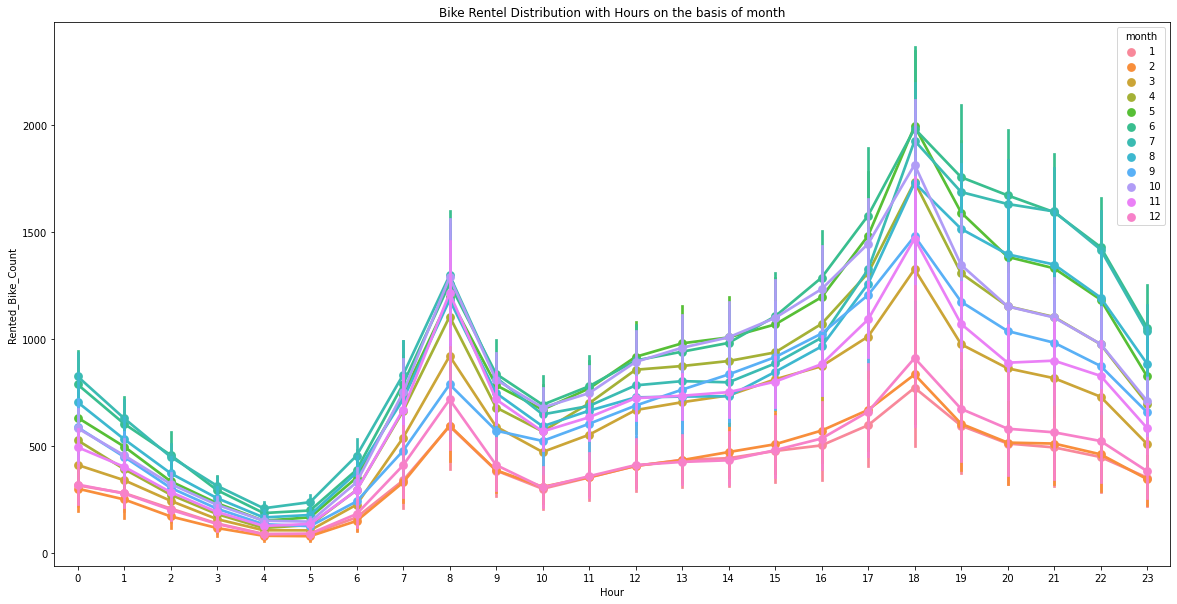

In [39]:
hue_list=['Holiday', 'Functioning_Day','day_name','Seasons', 'weekend', 'month']
for i in hue_list:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=bike['Hour'],y=bike['Rented_Bike_Count'],hue=bike[i])
 plt.title(f"Bike Rentel Distribution with Hours on the basis of {i}")
 plt.show()

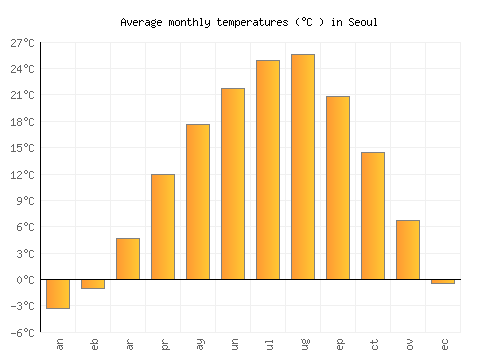

### Univariate Analysis on numarical features

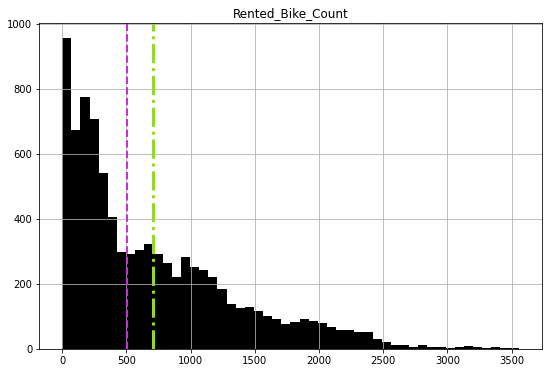

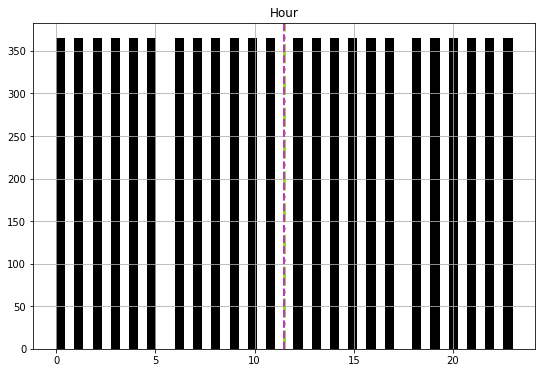

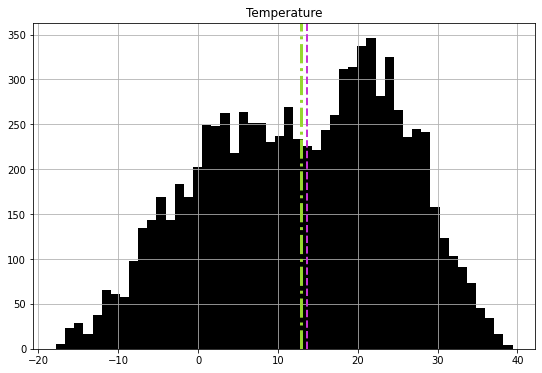

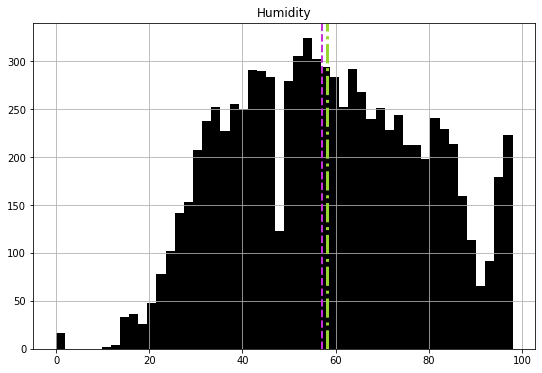

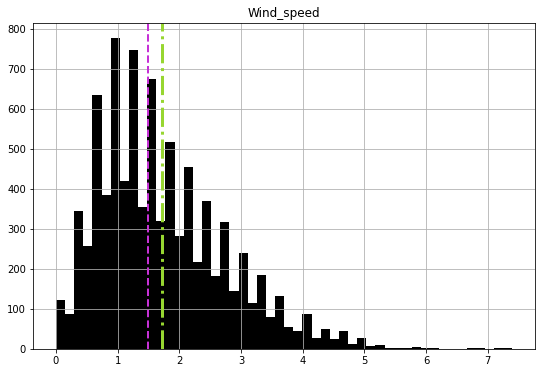

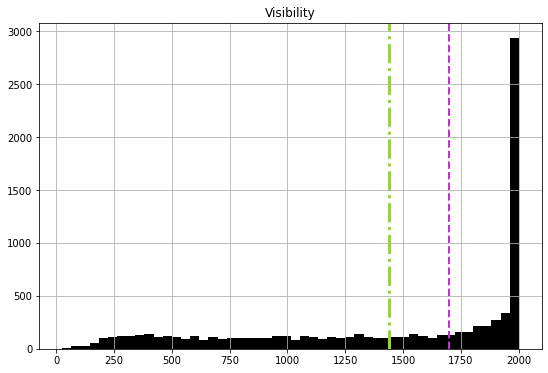

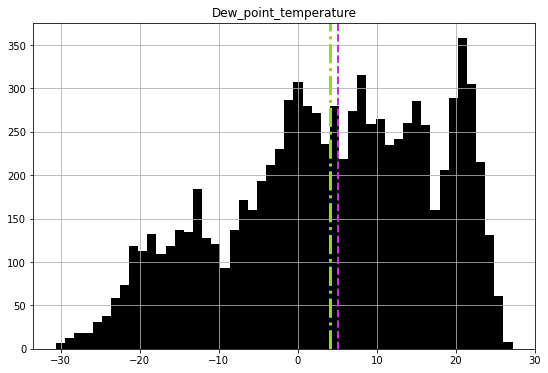

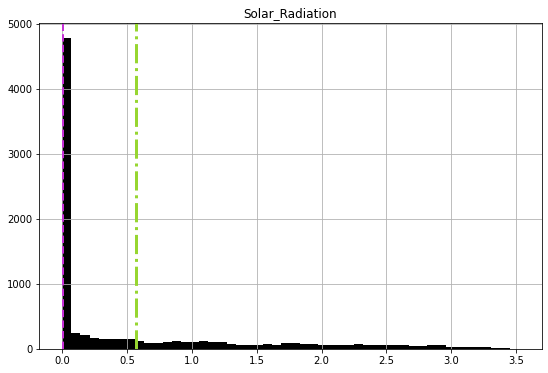

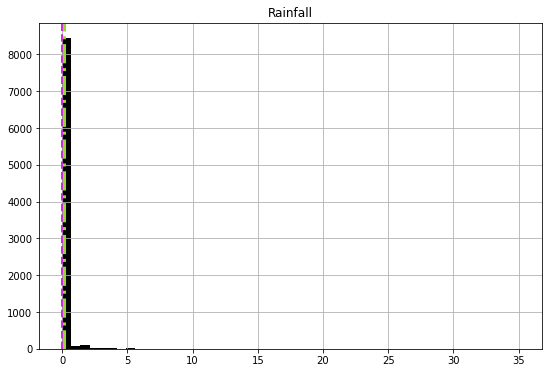

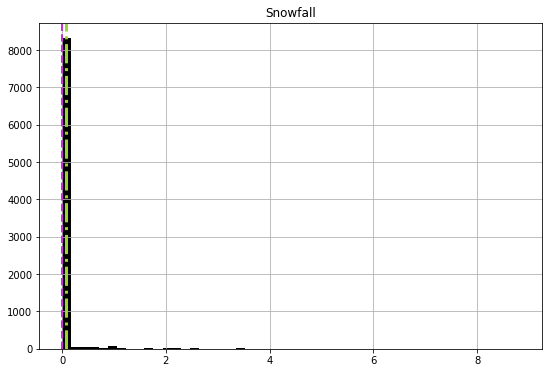

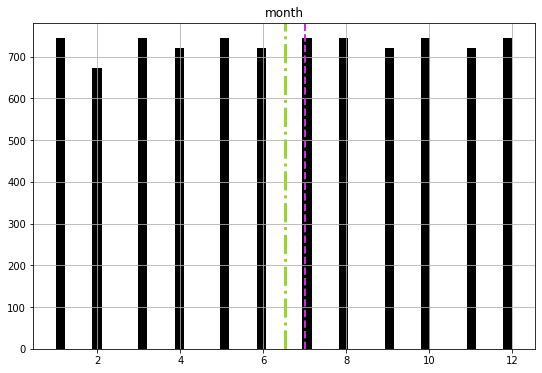

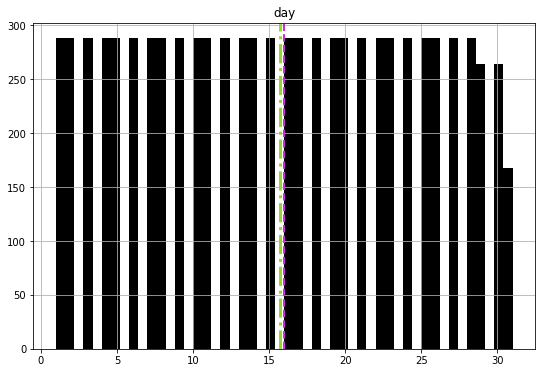

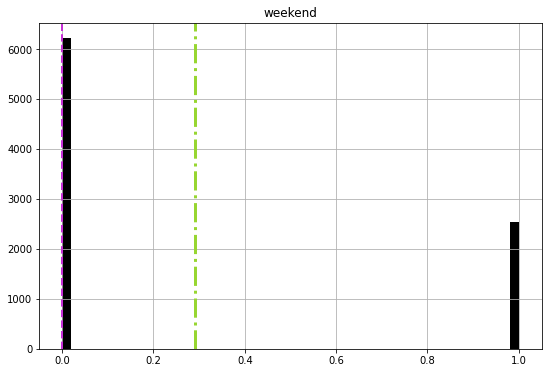

In [40]:
# Univariate Analysis

for col in numarical_column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike[col]
    feature.hist(bins=50, ax = ax,color='black')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis of numarical columns with target variable

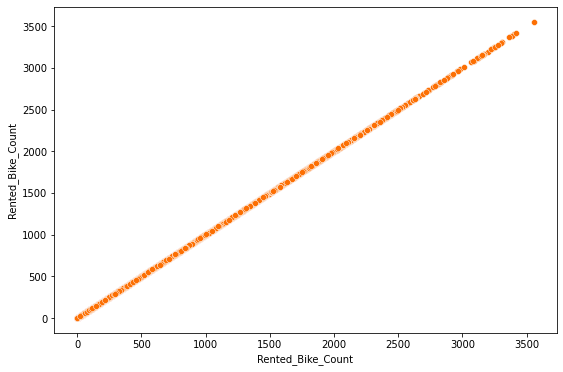

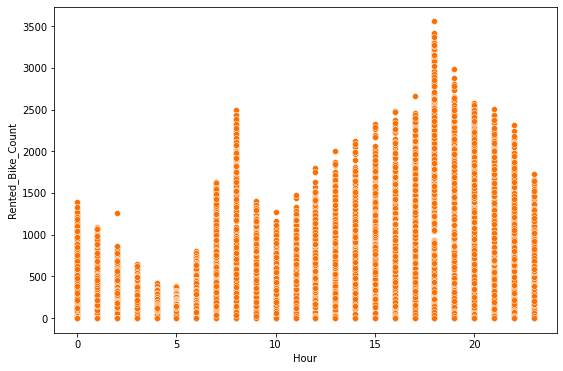

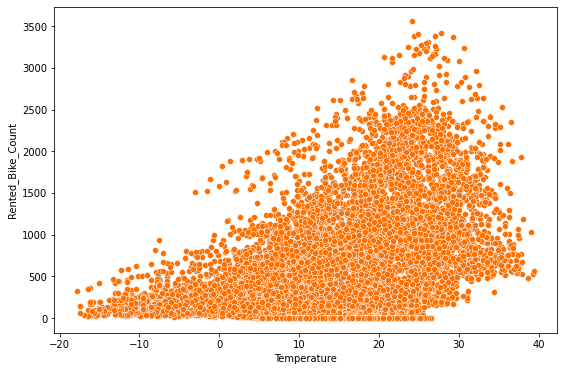

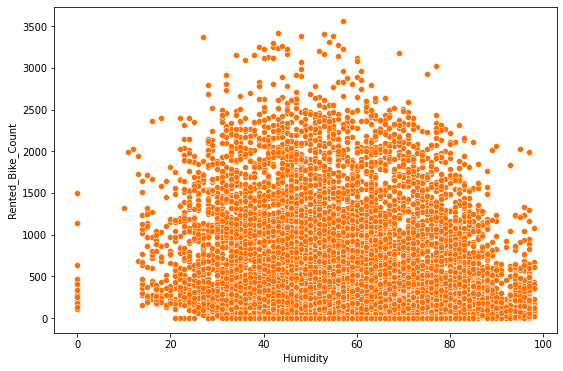

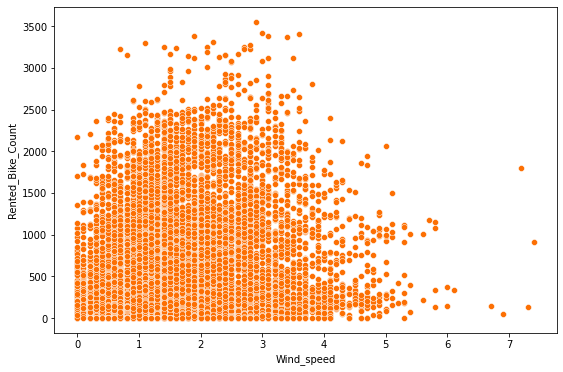

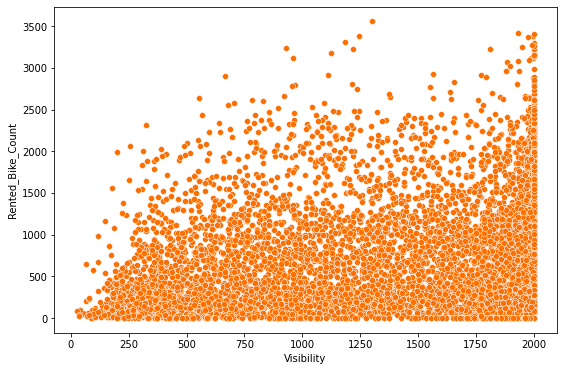

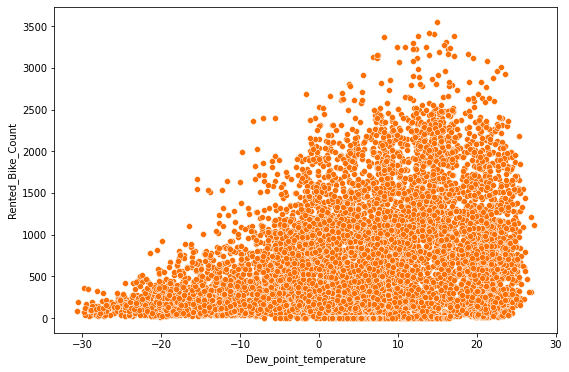

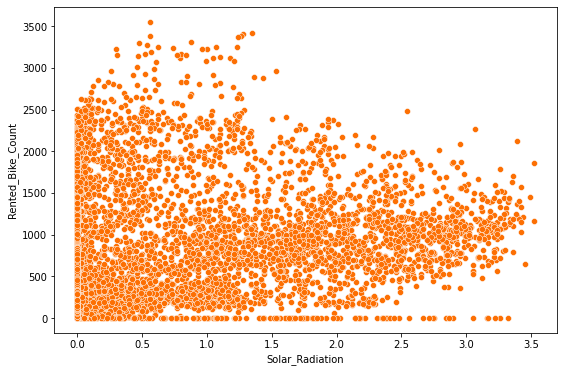

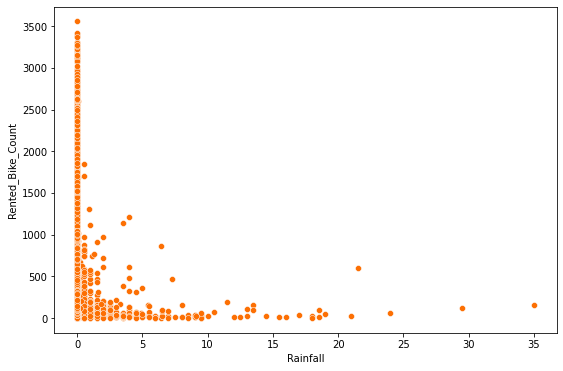

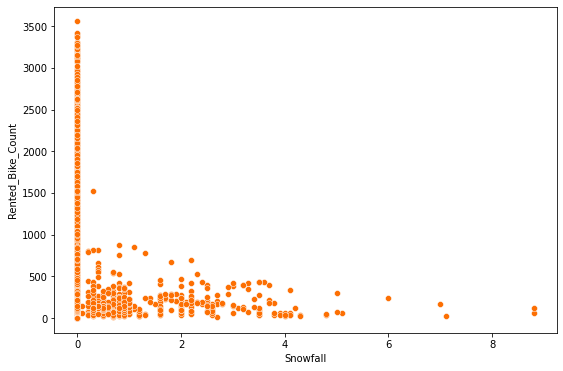

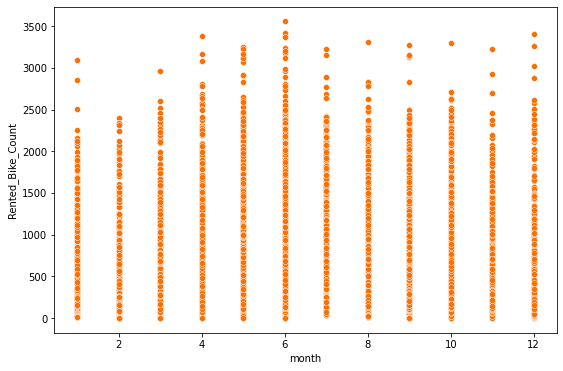

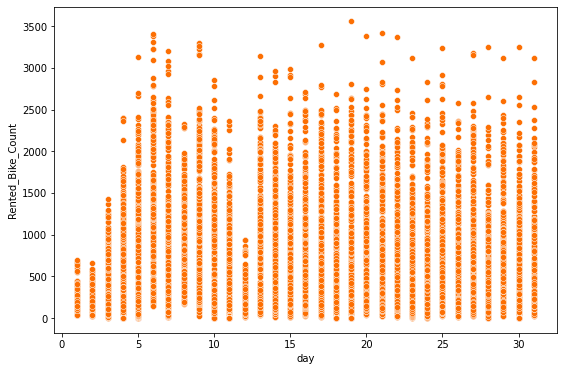

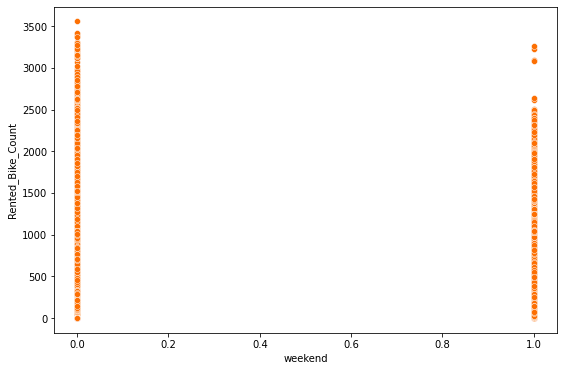

In [41]:
# Bivariate analysis on numarical columns with 

for i in numarical_column:
 fig = plt.figure(figsize=(9, 6))
 sns.scatterplot(y=bike['Rented_Bike_Count'],x=bike[i],color='#fc6f03')
 plt.show()

### Normalization of the distributions

#### target variable normalization

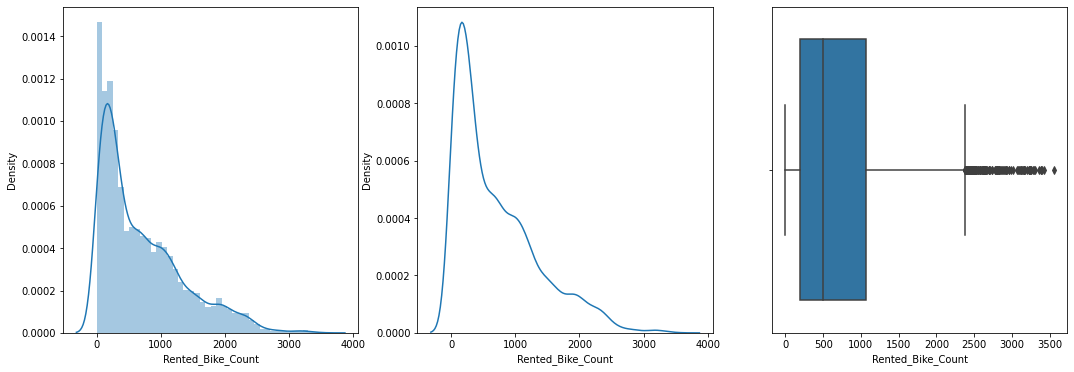

In [42]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.distplot(bike['Rented_Bike_Count'])
plt.subplot(1,3,2)
sns.distplot(bike['Rented_Bike_Count'],hist=False)
plt.subplot(1,3,3)
sns.boxplot(bike['Rented_Bike_Count'])

**According to skewed data, If skewness is**
* Moderate - Sqrt tranform
* High - normal log tranform
* higher - log base 10 tranform
* Extreme - reciprocal/inverse transform

In [43]:
# Apply sqrt transformations on target variable because this is moderate right skewed

transformed_target_variable=np.sqrt(bike['Rented_Bike_Count'])

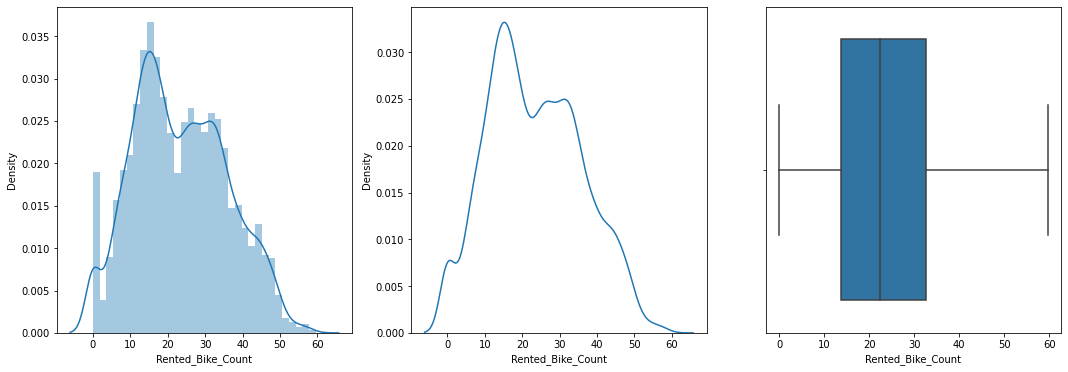

In [44]:
# Apply sqrt transformations on target variable because this is moderate right skewed

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.distplot(transformed_target_variable)
plt.subplot(1,3,2)
sns.distplot(transformed_target_variable,hist=False)
plt.subplot(1,3,3)
sns.boxplot(transformed_target_variable)

#### Nornalizing the numarical feature with sqrt tranform

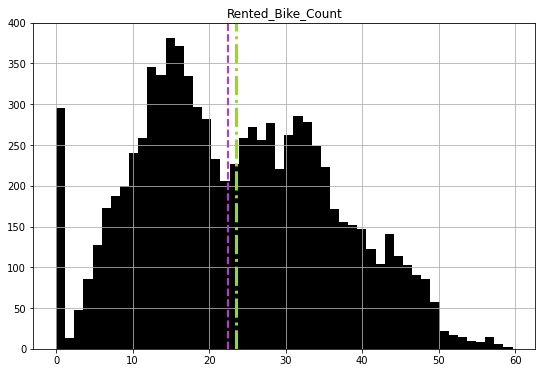

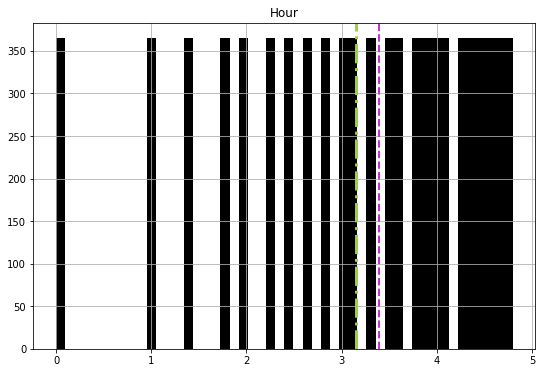

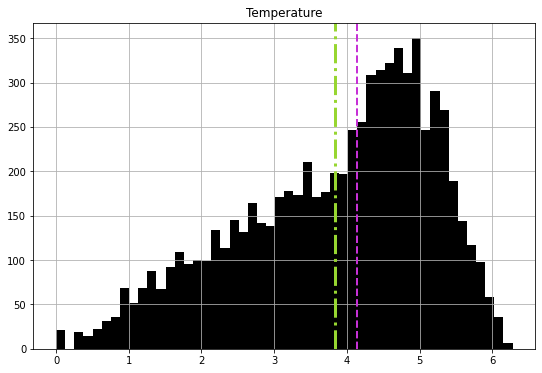

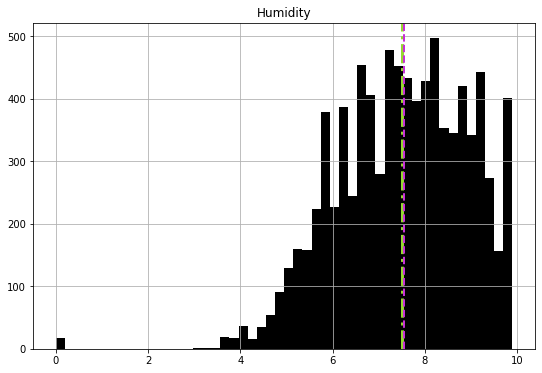

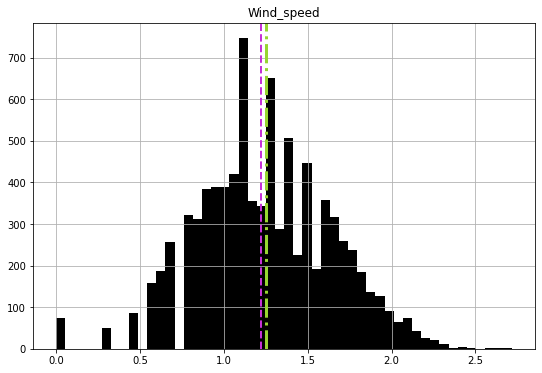

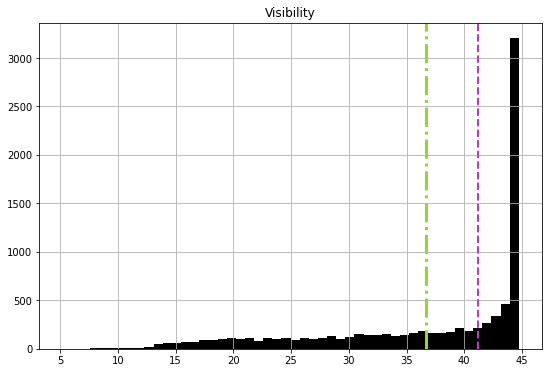

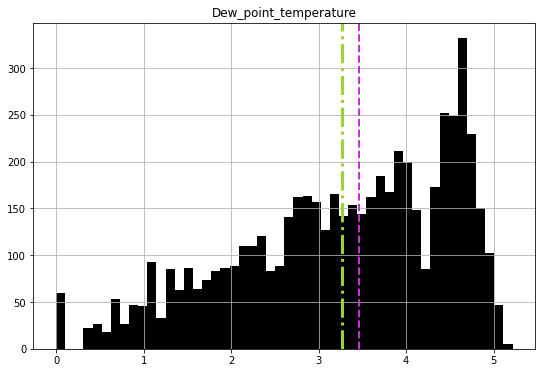

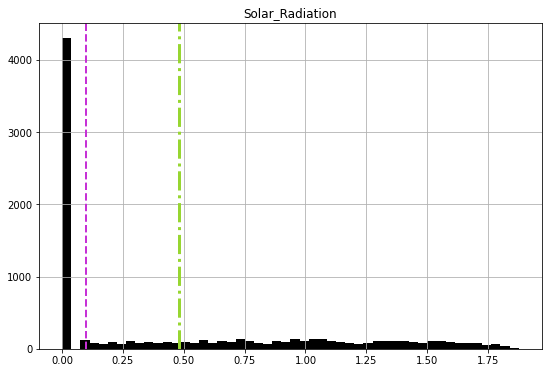

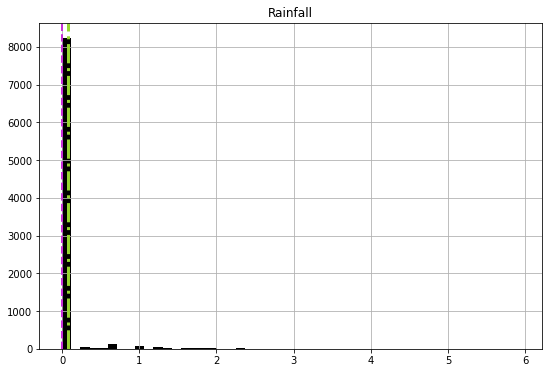

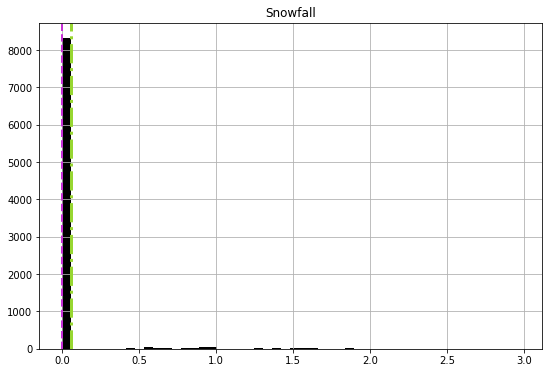

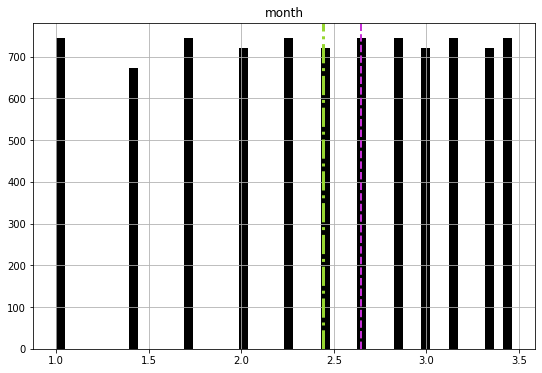

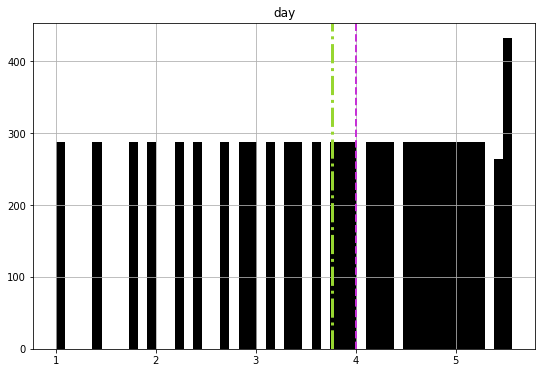

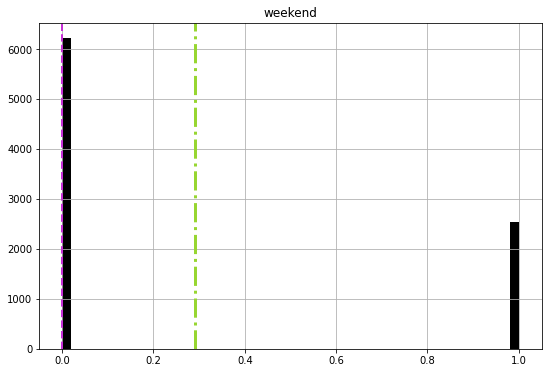

In [45]:
for col in numarical_column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike[col])
    feature.hist(bins=50, ax = ax,color='black')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

After tranformation is come closer to the normal distribution but not perfectly normal but its okay 

### Let's look the relationship of target variable with other numarical variables using regression plot

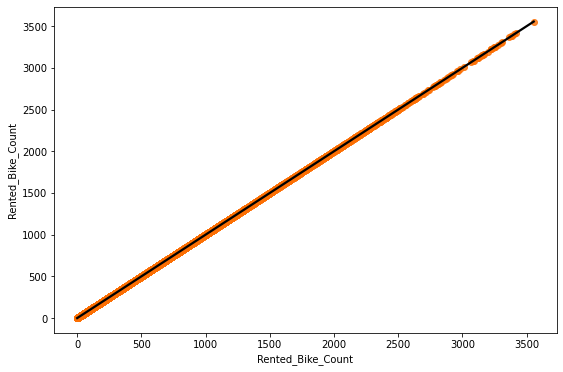

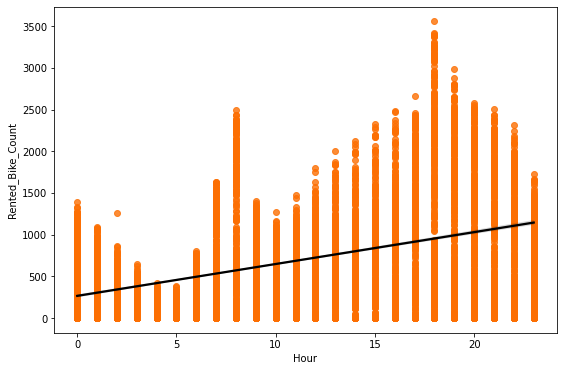

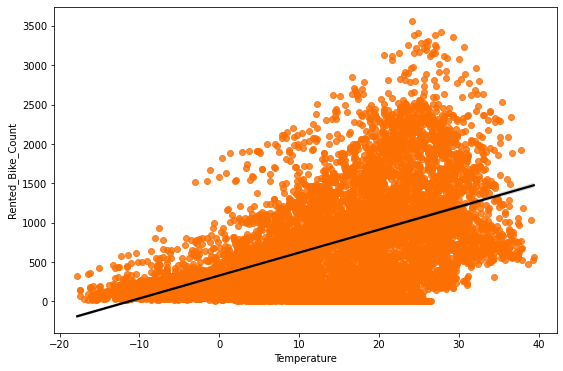

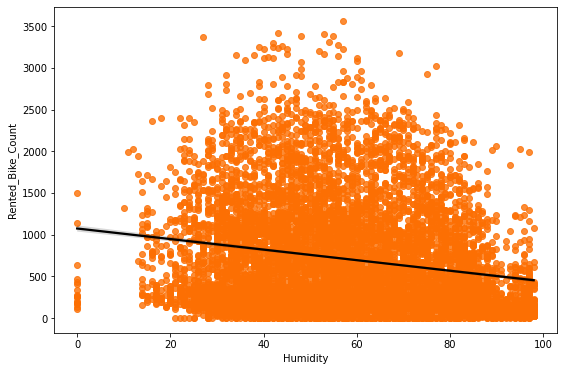

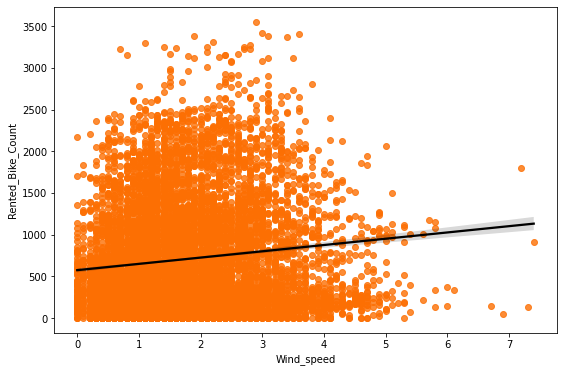

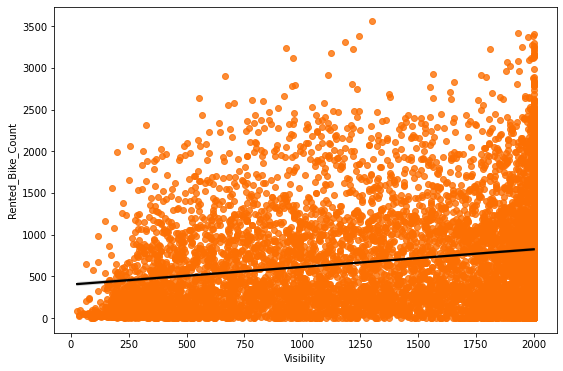

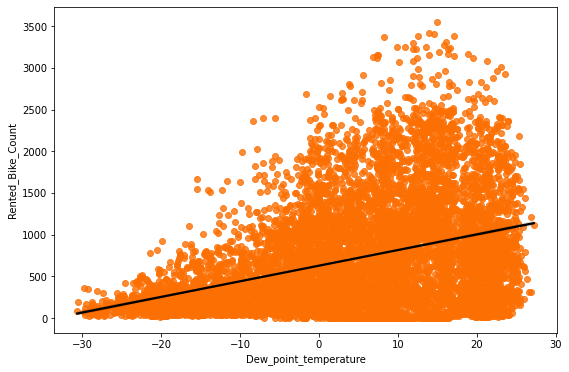

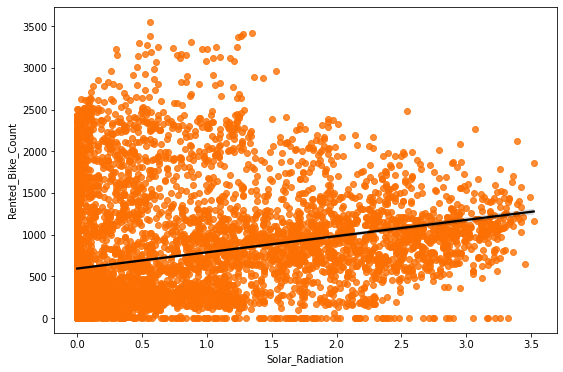

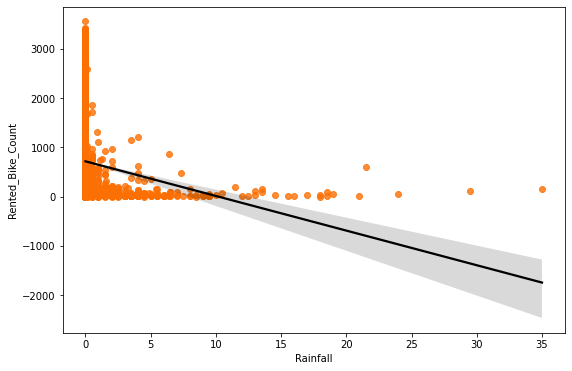

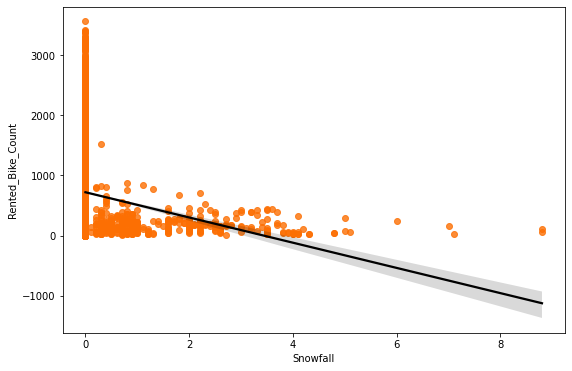

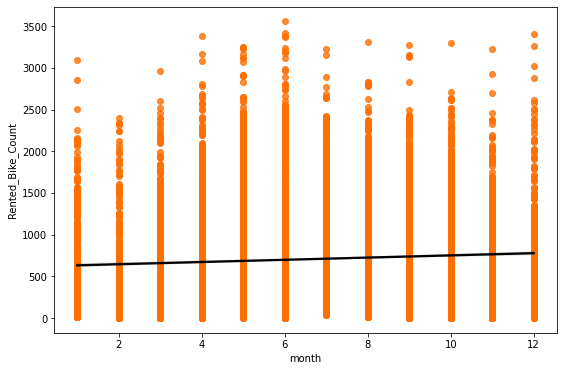

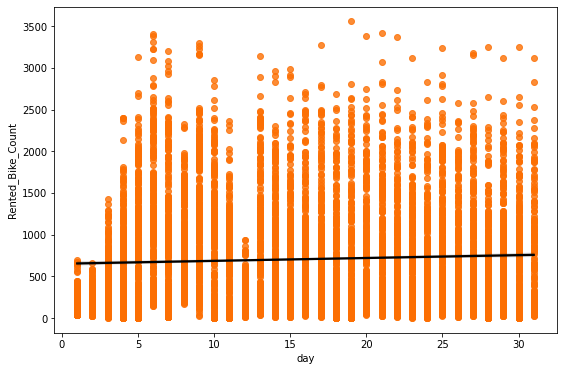

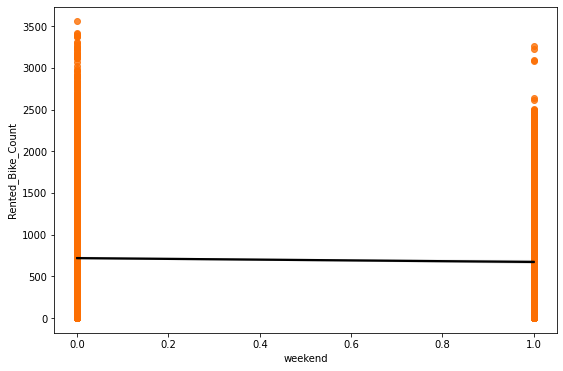

In [46]:
for i in numarical_column:
  plt.figure(figsize=(9,6))
  sns.regplot(x=bike[i],y=bike['Rented_Bike_Count'],scatter_kws={'color':'#fc6f03'},line_kws={'color':'black'})

### let's find out the correation between each variables

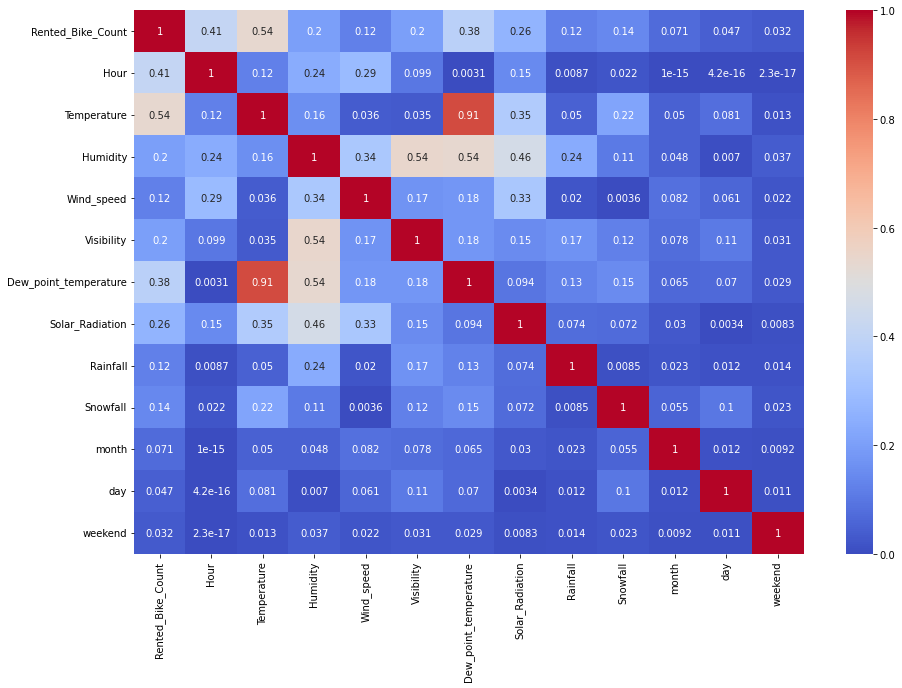

In [47]:
correlation_=bike.corr()
fig = plt.figure(figsize=(15, 10))
sns.heatmap(data=abs(correlation_),annot=True,cmap='coolwarm')

## ***Data Prepration For Modeling***

In [48]:
# Check the dataset 

bike.sample(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,day_name,weekend
5123,2018-02-07,153,11,21.7,97,0.5,591,21.1,0.25,8.0,0.0,Summer,No Holiday,Yes,2,7,Wednesday,0
3107,2018-09-04,644,11,7.5,54,0.9,1013,-1.2,2.49,0.0,0.0,Spring,No Holiday,Yes,9,4,Tuesday,0
6138,2018-08-13,2367,18,33.1,59,3.1,1726,24.0,0.72,0.0,0.0,Summer,No Holiday,Yes,8,13,Monday,0
2189,2018-02-03,65,5,-6.1,49,1.0,1621,-15.1,0.00,0.0,0.0,Spring,No Holiday,Yes,2,3,Saturday,1
3013,2018-05-04,84,13,7.7,95,1.9,442,6.9,0.40,0.0,0.0,Spring,No Holiday,Yes,5,4,Friday,0


In [49]:
# Drop the column of dew point temperature because of reducing Multicollinearity

bike.drop('Dew_point_temperature',inplace=True,axis=1)

In [50]:
# Drop the date column because this will not contributing in mode prepration

bike.drop('Date',inplace=True,axis=1)

In [51]:
# Drop the day_name column because of we have alternate of it 

bike.drop('day_name',inplace=True,axis=1)

In [52]:
# lets see how our dataset looks 

bike.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0


### Check Multicollinearity using variance_inflation_factor(VIF)

In [53]:
# Multicollinearity calculation function

from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
# caculate vif of our dataset with removing our target variable

Calculate_vif(bike[[i for i in bike.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,4.003324
1,Temperature,3.243151
2,Humidity,6.849374
3,Wind_speed,4.622382
4,Visibility,5.521674
5,Solar_Radiation,2.286315
6,Rainfall,1.081698
7,Snowfall,1.137598
8,month,4.606088
9,day,3.852824


In [55]:
# removing variables with high vif values

Calculate_vif(bike[[i for i in bike.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Hour,3.993565
1,Temperature,2.664934
2,Wind_speed,4.366713
3,Visibility,5.500992
4,Solar_Radiation,1.902310
5,Rainfall,1.046925
6,Snowfall,1.111268
7,month,3.945685
8,day,3.439256
9,weekend,1.382196


In [56]:
# removing variables with high vif values

Calculate_vif(bike[[i for i in bike.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.857855
1,Temperature,2.638554
2,Wind_speed,3.894863
3,Solar_Radiation,1.900662
4,Rainfall,1.030985
5,Snowfall,1.103299
6,month,3.398803
7,day,3.332746
8,weekend,1.363051


In [57]:
# Drop the humidity feature bases on its vif value

bike.drop('Humidity',inplace=True,axis=1)

In [58]:
# Drop the visibility feature bases on its vif value

bike.drop('Visibility',inplace=True,axis=1)

In [59]:
bike.head()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,weekend
0,254,0,-5.2,2.2,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
1,204,1,-5.5,0.8,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
2,173,2,-6.0,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
3,107,3,-6.2,0.9,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
4,78,4,-6.0,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0


In [60]:
# Holiday is a categorical column so convert it into numarical

bike['Holiday']=bike['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [61]:
bike.sample()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,weekend
6328,1112,16,30.4,2.0,1.82,0.0,0.0,Summer,0,Yes,8,21,0


In [62]:
# Functioning_day is also a categorical column so convert it into numarical

bike['Functioning_Day']=bike['Functioning_Day'].map({'Yes':1, 'No':0})

In [63]:
bike.sample()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,weekend
4300,204,4,19.8,1.9,0.0,0.0,0.0,Spring,0,1,5,29,0


In [64]:
# convert the seasons column into numarical values

bike['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [65]:
# Createing dummy variables for seasons 

bike=pd.get_dummies(bike,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [104]:
bike.sample()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,month,day,weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
3661,327,13,17.2,0.9,0.26,4.0,0.0,0,1,2,5,0,1,0,0


In [101]:
# check for the data type of all columns

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning_Day    8760 non-null   int64  
 9   month              8760 non-null   int64  
 10  day                8760 non-null   int64  
 11  weekend            8760 non-null   int64  
 12  Seasons_Spring     8760 non-null   uint8  
 13  Seasons_Summer     8760 non-null   uint8  
 14  Seasons_Winter     8760 non-null   uint8  
dtypes: float64(5), int64(7), uint8(3)
memory usage: 847.0 KB


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [70]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [71]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [72]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [73]:
# Expand Contraction

#### 2. Lower Casing

In [74]:
# Lower Casing

#### 3. Removing Punctuations

In [75]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [76]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [77]:
# Remove Stopwords

In [78]:
# Remove White spaces

#### 6. Rephrase Text

In [79]:
# Rephrase Text

#### 7. Tokenization

In [80]:
# Tokenization

#### 8. Text Normalization

In [81]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [82]:
# POS Taging

#### 10. Text Vectorization

In [83]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [84]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [85]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [86]:
# Transform Your data

### 6. Data Scaling

In [87]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [88]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [89]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [90]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [91]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [96]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [99]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [100]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***